In [17]:
import os
import trodes_data_parser as tdp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pdb

#directory and file names
expDir = '/Users/bassp/PycharmProjects/ReachMaster/software/robot_calibration'
folderName = 'Calibration_6_6_2022'
# folderName = '2dPositionTest1'
tFile = expDir +  '/%s/%s.analog/%s.timestamps.dat' % (folderName, folderName, folderName)
dIn1File = expDir + '/%s/%s.DIO/%s.dio_xPush.dat' % (folderName, folderName, folderName)
dIn2File = expDir + '/%s/%s.DIO/%s.dio_xPull.dat' % (folderName, folderName, folderName)
dIn3File = expDir + '/%s/%s.DIO/%s.dio_yPush.dat' % (folderName, folderName, folderName)
dIn4File =  expDir + '/%s/%s.DIO/%s.dio_yPull.dat' % (folderName, folderName, folderName)
AIn2File =  expDir + '/%s/%s.analog/%s.analog_potX.dat' % (folderName, folderName, folderName)
AIn4File = expDir + '/%s/%s.analog/%s.analog_potY.dat' % (folderName, folderName, folderName)

#read data
clockrate = tdp.readTrodesExtractedDataFile(tFile)
clockrate = np.float_(clockrate['clockrate'])
pdb.set_trace()
time = tdp.readTrodesExtractedDataFile(tFile)['data'][0:-1:100]
time = np.array([i[0] for i in time],dtype='float_')
dIn1 = tdp.readTrodesExtractedDataFile(dIn1File)['data']
dIn1 = np.array([i[0] for i in dIn1],dtype='float_')
dIn1 = (dIn1 - time[0])/clockrate #convert to seconds
dIn2 = tdp.readTrodesExtractedDataFile(dIn2File)['data']
dIn2 = np.array([i[0] for i in dIn2],dtype='float_')
dIn2 = (dIn2 - time[0])/clockrate #convert to seconds
dIn3 = tdp.readTrodesExtractedDataFile(dIn3File)['data']
dIn3 = np.array([i[0] for i in dIn3],dtype='float_')
dIn3 = (dIn3 - time[0])/clockrate #convert to seconds
dIn4 = tdp.readTrodesExtractedDataFile(dIn4File)['data']
dIn4 = np.array([i[0] for i in dIn4],dtype='float_')
dIn4 = (dIn4 - time[0])/clockrate #convert to seconds
time = (time - time[0])/clockrate
AIn2 = tdp.readTrodesExtractedDataFile(AIn2File)['data']['voltage'][0:-1:100]/32767.0*10.0/3.3*5.0
AIn4 = tdp.readTrodesExtractedDataFile(AIn4File)['data']['voltage'][0:-1:100]/32767.0*10.0/3.3*5.0

--Return--
None
> <ipython-input-17-13f36cd2208d>(26)<module>()
     24 clockrate = tdp.readTrodesExtractedDataFile(tFile)
     25 clockrate = np.float_(clockrate['clockrate'])
---> 26 pdb.set_trace()
     27 time = tdp.readTrodesExtractedDataFile(tFile)['data'][0:-1:100]
     28 time = np.array([i[0] for i in time],dtype='float_')

ipdb> clockrate
30000.0
ipdb> c


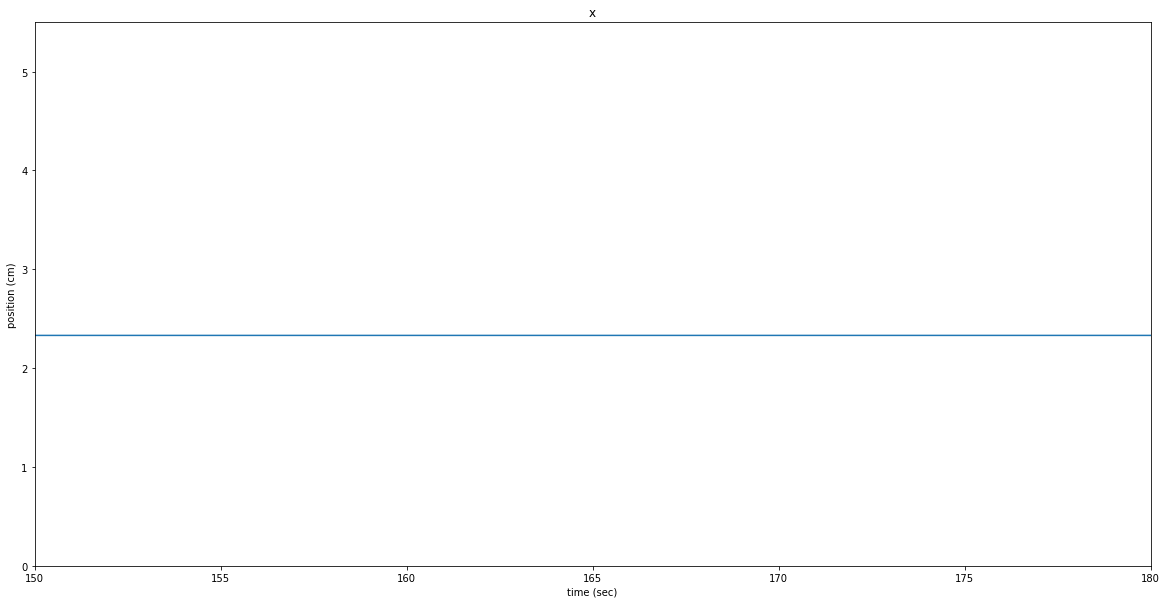

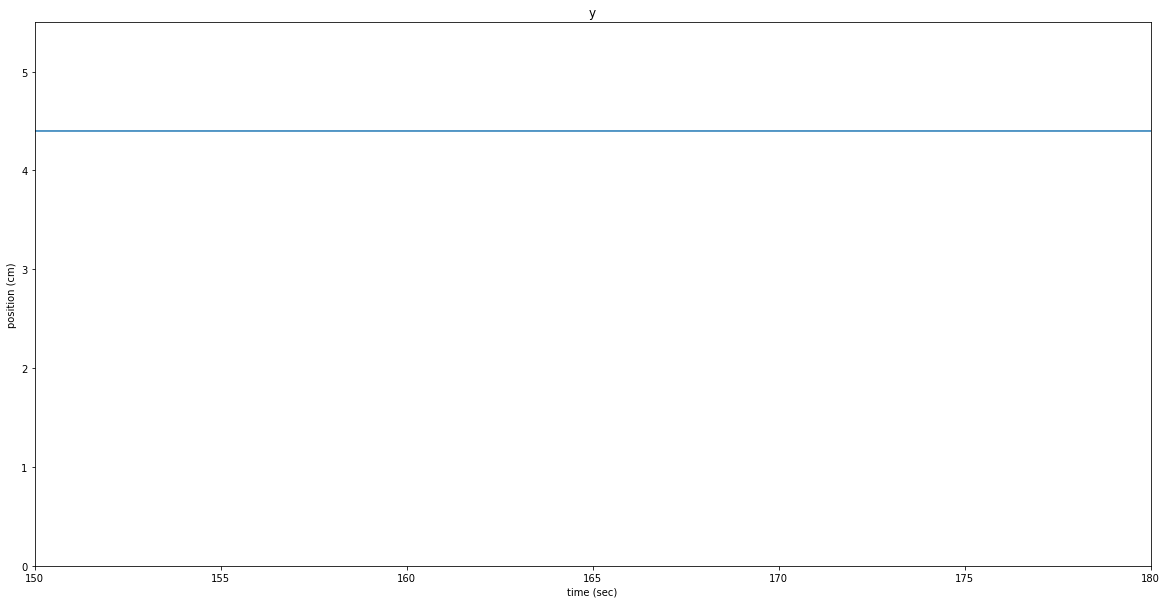

In [18]:
#plot position data
plt.figure(figsize=(20,10))
plt.plot(time,AIn2)
plt.xlabel('time (sec)')
plt.ylabel('position (cm)')
plt.title('x')
plt.ylim((0,5.5))
plt.xlim((150,180))
plt.savefig('x sweep_displacement_test1.png')
plt.figure(figsize=(20,10))
plt.plot(time,AIn4)
plt.xlabel('time (sec)')
plt.ylabel('position (cm)')
plt.title('y')
plt.ylim((0,5.5))
plt.xlim((150,180))
plt.savefig('y sweep_displacement_test1.png')

In [ ]:
#get push/pull intervals
xPushStartTimes = dIn1[1::2]
xPushStopTimes = dIn1[2::2]
xPullStartTimes = dIn2[1::2]
xPullStopTimes = dIn2[2::2]
yPushStartTimes = dIn3[1::2]
yPushStopTimes = dIn3[2::2]
yPullStartTimes = dIn4[1::2]
yPullStopTimes = dIn4[2::2]

xPushDur = xPushStopTimes - xPushStartTimes
xPullDur = xPullStopTimes - xPullStartTimes
yPushDur = yPushStopTimes - yPushStartTimes
yPullDur = yPullStopTimes - yPullStartTimes

xPushStartTimes = xPushStartTimes
xPullStartTimes = xPullStartTimes
yPushStartTimes = yPushStartTimes
yPullStartTimes = yPullStartTimes

xNumPush = xPushStartTimes.size
xNumPull = xPullStartTimes.size
yNumPush = yPushStartTimes.size
yNumPull = yPullStartTimes.size

#preallocate
xPushPosStart = np.zeros(xNumPush)
xPushPosStop = np.zeros(xNumPush)
xPullPosStart = np.zeros(xNumPull)
xPullPosStop = np.zeros(xNumPull)
yPushPosStart = np.zeros(yNumPush)
yPushPosStop = np.zeros(yNumPush)
yPullPosStart = np.zeros(yNumPull)
yPullPosStop = np.zeros(yNumPull)

xyPushPosStart = np.zeros(xNumPush)
xyPushPosStop = np.zeros(xNumPush)
xyPullPosStart = np.zeros(xNumPull)
xyPullPosStop = np.zeros(xNumPull)
yxPushPosStart = np.zeros(yNumPush)
yxPushPosStop = np.zeros(yNumPush)
yxPullPosStart = np.zeros(yNumPull)
yxPullPosStop = np.zeros(yNumPull)

#loop over x pushes
for i in range(xNumPush):
    idx1 = np.min(np.where(time>=xPushStartTimes[i]))
    idx2 = np.min(np.where(time>=(time[idx1]+0.1)))
    xPushPosStart[i] = AIn2[idx1]
    xPushPosStop[i] = AIn2[idx2]  
    xyPushPosStart[i] = AIn4[idx1]
    xyPushPosStop[i] = AIn4[idx2] 
#loop over x pulls
for i in range(xNumPull):
    idx1 = np.min(np.where(time>=xPullStartTimes[i]))
    idx2 = np.min(np.where(time>=(time[idx1]+0.1)))
    xPullPosStart[i] = AIn2[idx1]
    xPullPosStop[i] = AIn2[idx2]
    xyPullPosStart[i] = AIn4[idx1]
    xyPullPosStop[i] = AIn4[idx2]
#loop over y pushes
for i in range(yNumPush):
    idx1 = np.min(np.where(time>=yPushStartTimes[i]))
    idx2 = np.min(np.where(time>=(time[idx1]+0.1)))
    yPushPosStart[i] = AIn4[idx1]
    yPushPosStop[i] = AIn4[idx2]   
    yxPushPosStart[i] = AIn2[idx1]
    yxPushPosStop[i] = AIn2[idx2] 
#loop over y pulls
for i in range(yNumPull):
    idx1 = np.min(np.where(time>=yPullStartTimes[i]))
    idx2 = np.min(np.where(time>=(time[idx1]+0.1)))
    yPullPosStart[i] = AIn4[idx1]
    yPullPosStop[i] = AIn4[idx2]
    yxPullPosStart[i] = AIn2[idx1]
    yxPullPosStop[i] = AIn2[idx2]
    
xPushDisp = xPushPosStop-xPushPosStart
xPullDisp = xPullPosStop-xPullPosStart
yPushDisp = yPushPosStop-yPushPosStart
yPullDisp = yPullPosStop-yPullPosStart


# #remove pulses that hit the ends
# pushDur = pushDur[pushPosStop<np.max(pushPosStop-0.2)]
# pushDisp = pushDisp[pushPosStop<np.max(pushPosStop-0.2)]
# pushPosStart = pushPosStart[pushPosStop<np.max(pushPosStop-0.2)]
# pullDur = pullDur[pullPosStop>np.min(pullPosStop+0.2)]
# pullDisp = pullDisp[pullPosStop>np.min(pullPosStop+0.2)]
# pullPosStart = pullPosStart[pullPosStop>np.min(pullPosStop+0.2)]

C:\Users\bassp\anaconda3\envs\DLC-GPU\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
C:\Users\bassp\anaconda3\envs\DLC-GPU\lib\site-packages\ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
C:\Users\bassp\anaconda3\envs\DLC-GPU\lib\site-packages\ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Axes3D(fig

NameError: name 'pushDur' is not defined

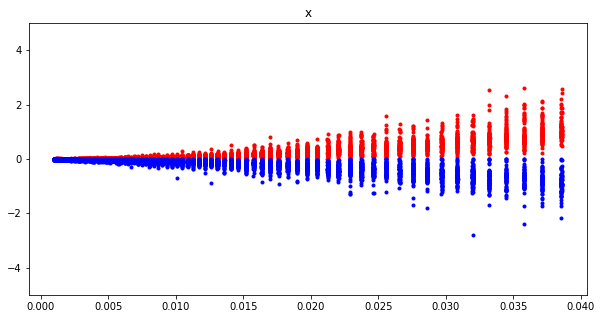

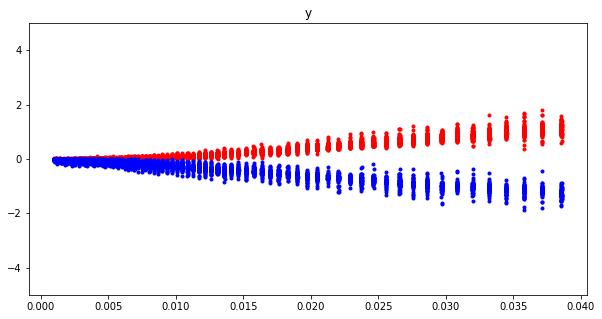

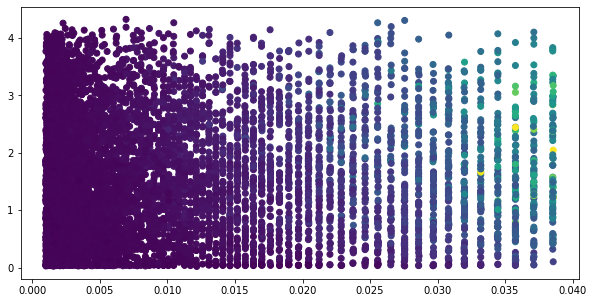

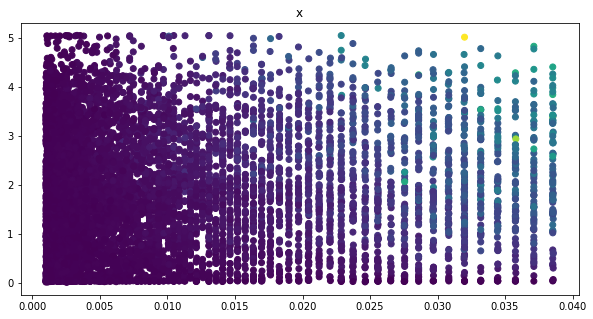

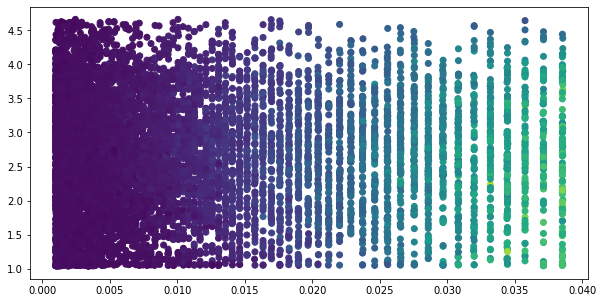

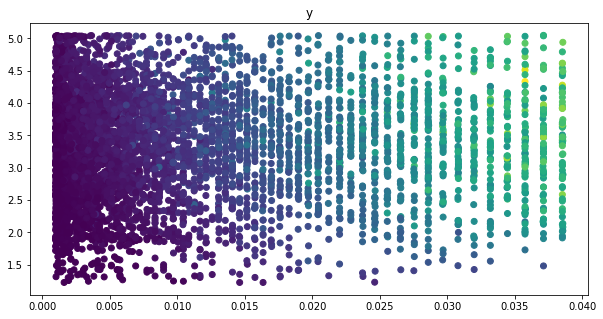

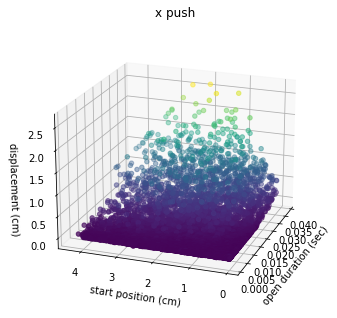

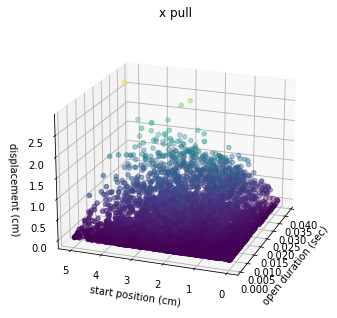

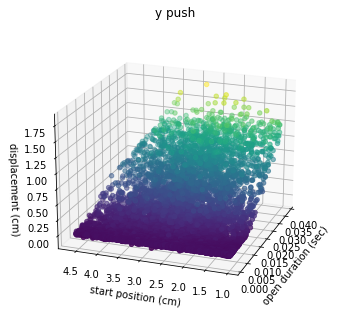

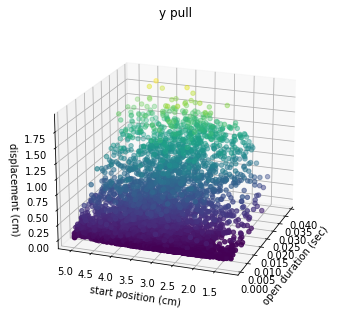

In [20]:



#1D scatters
plt.figure(figsize=(10,5))        
plt.plot(xPushDur,xPushDisp,'.r')
plt.plot(xPullDur,xPullDisp,'.b')
plt.ylim((-5,5))
plt.title('x')
plt.figure(figsize=(10,5))        
plt.plot(yPushDur,yPushDisp,'.r')
plt.plot(yPullDur,yPullDisp,'.b')
plt.ylim((-5,5))
plt.title('y')

# #2D scatters
plt.figure(figsize=(10,5)) 
plt.scatter(xPushDur,xPushPosStart,c=xPushDisp)
plt.figure(figsize=(10,5)) 
plt.scatter(xPullDur,xPullPosStart,c=abs(xPullDisp))
plt.title('x')
plt.savefig('x2d.png')

plt.figure(figsize=(10,5)) 
plt.scatter(yPushDur,yPushPosStart,c=yPushDisp)
plt.figure(figsize=(10,5)) 
plt.scatter(yPullDur,yPullPosStart,c=abs(yPullDisp))
plt.title('y')

plt.savefig('y2d.png')
#3D scatters
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(xPushDur,xPushPosStart,zs=xPushDisp,c=xPushDisp)
ax.set_xlabel('open duration (sec)')
ax.set_ylabel('start position (cm)')
ax.set_zlabel('displacement (cm)')
plt.title('x push')
# rotate the axes and update
ax.view_init(20,200)
plt.draw()
plt.savefig('duration_position_displacement_xpush_scatter.png')
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(xPullDur,xPullPosStart,zs=abs(xPullDisp),c=abs(xPullDisp))
ax.set_xlabel('open duration (sec)')
ax.set_ylabel('start position (cm)')
ax.set_zlabel('displacement (cm)')
plt.title('x pull')
# rotate the axes and update
ax.view_init(20,200)
plt.draw()
plt.savefig('duration_position_displacement_xpull_scatter.png')
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(yPushDur,yPushPosStart,zs=yPushDisp,c=yPushDisp)
ax.set_xlabel('open duration (sec)')
ax.set_ylabel('start position (cm)')
ax.set_zlabel('displacement (cm)')
plt.title('y push')
# rotate the axes and update
ax.view_init(20,200)
plt.draw()
plt.savefig('duration_position_displacement_ypush_scatter.png')
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(yPullDur,yPullPosStart,zs=abs(yPullDisp),c=abs(yPullDisp))
ax.set_xlabel('open duration (sec)')
ax.set_ylabel('start position (cm)')
ax.set_zlabel('displacement (cm)')
plt.title('y pull')
# rotate the axes and update
ax.view_init(20,200)
plt.draw()
plt.savefig('duration_position_displacement_ypull_scatter.png')

# #do kernel smoothing
from matplotlib import cm
fitstd = 0.05
numGrid = 50
pushFit = np.zeros((numGrid,numGrid))
pushDurSc = pushDur/np.max(pushDur)
pushPosSc = pushPosStart-np.min(pushPosStart)
pushPosScSc = pushPosSc/np.max(pushPosSc)
pullFit = np.zeros((numGrid,numGrid))
pullDurSc = pullDur/np.max(pullDur)
pullPosSc = pullPosStart-np.min(pullPosStart)
pullPosScSc = pullPosSc/np.max(pullPosSc)

# #estimate fit
for i in range(numGrid):
    pushDurDiffs = pushDurSc - 1.0*i/numGrid 
    pullDurDiffs = pullDurSc - 1.0*i/numGrid 
    for j in range(numGrid):  
        pushPosDiffs = pushPosScSc - 1.0*j/numGrid        
        pushKernel = np.exp(-0.5*(pushDurDiffs**2+pushPosDiffs**2)/fitstd**2)
        pushFit[i,j] = np.sum(pushDisp*pushKernel)/(np.sum(pushKernel))
        pullPosDiffs = pullPosScSc - 1.0*j/numGrid        
        pullKernel = np.exp(-0.5*(pullDurDiffs**2+pullPosDiffs**2)/fitstd**2)
        pullFit[i,j] = np.sum(abs(pullDisp)*pullKernel)/(np.sum(pullKernel))
        
# #3D surface fit
durGrid = np.arange(numGrid,dtype='float32')/numGrid*np.max(pushDur)
posGrid = np.arange(numGrid,dtype='float32')/numGrid*np.max(pushPosSc)+np.min(pushPosStart)
posGrid, durGrid = np.meshgrid(posGrid, durGrid)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(durGrid,posGrid,pushFit,cmap=cm.viridis,alpha=1.0)
ax.set_xlabel('open duration (sec)')
ax.set_ylabel('start position (cm)')
ax.set_zlabel('displacement (cm)')
plt.title('y push')
ax.view_init(20,200)
plt.savefig('duration_position_displacement_push_fit.png')
durGrid = np.arange(numGrid,dtype='float32')/numGrid*np.max(pullDur)
posGrid = np.arange(numGrid,dtype='float32')/numGrid*np.max(pullPosSc)+np.min(pullPosStart)
posGrid, durGrid = np.meshgrid(posGrid, durGrid)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(durGrid,posGrid,pullFit,cmap=cm.viridis,alpha=1.0)
ax.set_xlabel('open duration (sec)')
ax.set_ylabel('start position (cm)')
ax.set_zlabel('displacement (cm)')
plt.title('y pull')
ax.view_init(20,200)
plt.savefig('duration_position_displacement_pull_fit.png')



In [4]:
#save data as pandas dataframe
d = {'xposition': xPushPosStart, 'yposition': xyPushPosStart, 'duration': xPushDur, 'displacement': xPushDisp}
xPushDF = pd.DataFrame(data=d)
d = {'xposition': xPullPosStart, 'yposition': xyPullPosStart, 'duration': xPullDur, 'displacement': xPullDisp}
xPullDF = pd.DataFrame(data=d)
xPushDF.to_csv(path_or_buf='xPushDF.csv')
xPullDF.to_csv(path_or_buf='xPullDF.csv')
d = {'yposition': yPushPosStart, 'xposition': yxPushPosStart, 'duration': yPushDur, 'displacement': yPushDisp}
yPushDF = pd.DataFrame(data=d)
d = {'yposition': yPullPosStart, 'xposition': yxPullPosStart, 'duration': yPullDur, 'displacement': yPullDisp}
yPullDF = pd.DataFrame(data=d)
yPushDF.to_csv(path_or_buf='yPushDF.csv')
yPullDF.to_csv(path_or_buf='yPullDF.csv')


In [7]:
np.max(pparray)

936.6471

In [8]:
936.6471/1023

0.9155885630498534